In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
#from sklearn import neighbors, datasets
#from sklearn.cluster import DBSCAN
#from sklearn.preprocessing import StandardScaler
#import geopandas as gf
#from shapely.geometry import Point


train_all_first = pd.read_pickle("../data/processed_all/train_all_first.pickle")
train_all_first

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,116.00,40.35,0.456070,...,12,1,0,1,0,0,9,-2,dyq,12
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,116.39,39.99,0.072801,...,22,1,0,0,1,0,9,-2,dyq,12
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,116.41,39.92,0.238537,...,10,0,0,1,0,0,10,-2,qdy,12
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,116.58,40.08,0.256125,...,12,1,0,1,0,1,24,14,dy,12
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,116.39,39.89,0.063246,...,13,0,0,1,0,1,25,10,q,12
5,1601375.0,2018-10-03 12:12:42,1.0,101804.0,2018-10-03 07:36:13,116.18,40.23,116.00,40.36,0.222036,...,7,0,1,0,0,1,25,10,q,12
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,116.39,39.91,0.022361,...,13,1,0,1,0,0,8,-1,q,12
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,116.58,40.08,0.256125,...,12,1,0,1,0,1,24,14,dy,12
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,116.39,39.91,0.022361,...,14,1,0,1,0,0,8,-1,q,12
9,299386.0,2018-10-04 20:55:27,1.0,101804.0,2018-10-04 20:55:20,116.39,39.89,116.41,39.89,0.020000,...,20,0,0,0,1,1,25,12,q,12


In [5]:
beijing_districts = pd.read_csv("../data/external/districts/beijing_districts.csv")
beijing_districts

,District,No.,o_long,o_lat
0,Dongcheng,1,116.411111,39.923056
1,Xicheng,2,116.360270,39.911510
2,Chaoyang,3,116.443710,39.922478
3,Fengtai,4,116.286700,39.858700
4,Shijingshan,5,116.223000,39.906300
5,Haidian,6,116.298300,39.960000
6,Mentougou,7,116.101400,39.940200
7,Fangshan,8,116.143400,39.748800
8,Tongzhou,9,116.656389,39.910000
9,Shunyi,10,116.655291,40.127577


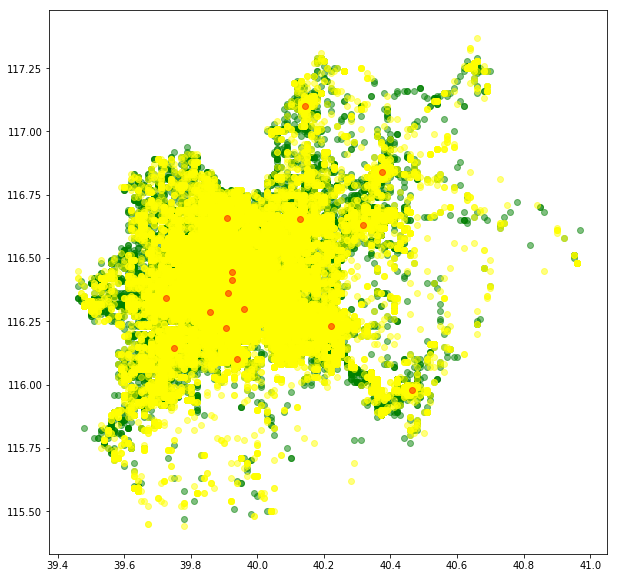

In [4]:
# Plot Beijing Districts and Origin
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(train_all_first.o_lat, train_all_first.o_long, color="green", alpha=0.5)
ax.scatter(train_all_first.d_lat, train_all_first.d_long, color="yellow", alpha=0.5)
ax.scatter(beijing_districts.o_lat, beijing_districts.o_long, color="red", alpha=0.5)

In [5]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [6]:
# Getting coordinates of Starting Points
f1 = train_all_first['o_lat'].values
f2 = train_all_first['o_long'].values
P = np.array(list(zip(f1, f2)))
len(P)

500000

In [7]:
# Getting coordinates of Starting Points
g1 = train_all_first['d_lat'].values
g2 = train_all_first['d_long'].values
Q = np.array(list(zip(g1, g2)))
len(Q)

500000

In [6]:
# Number of clusters
k = 16

# Setting Centroids
x1 = beijing_districts['o_lat'].values
y1 = beijing_districts['o_long'].values
C = np.array(list(zip(x1, y1)))
len(C)

16

In [7]:
C

array([[ 39.923056, 116.411111],
       [ 39.91151 , 116.36027 ],
       [ 39.922478, 116.44371 ],
       [ 39.8587  , 116.2867  ],
       [ 39.9063  , 116.223   ],
       [ 39.96    , 116.2983  ],
       [ 39.9402  , 116.1014  ],
       [ 39.7488  , 116.1434  ],
       [ 39.91    , 116.656389],
       [ 40.127577, 116.655291],
       [ 40.221   , 116.2312  ],
       [ 39.7269  , 116.3414  ],
       [ 40.316   , 116.632   ],
       [ 40.142222, 117.101111],
       [ 40.374444, 116.839444],
       [ 40.464521, 115.980185]])

In [8]:
x = []

for each in C:
    x = each
    print(f'x = {x}')

x = [ 39.923056 116.411111]
x = [ 39.91151 116.36027]
x = [ 39.922478 116.44371 ]
x = [ 39.8587 116.2867]
x = [ 39.9063 116.223 ]
x = [ 39.96   116.2983]
x = [ 39.9402 116.1014]
x = [ 39.7488 116.1434]
x = [ 39.91     116.656389]
x = [ 40.127577 116.655291]
x = [ 40.221  116.2312]
x = [ 39.7269 116.3414]
x = [ 40.316 116.632]
x = [ 40.142222 117.101111]
x = [ 40.374444 116.839444]
x = [ 40.464521 115.980185]


In [9]:
train_all_first_districts = train_all_first

In [10]:
index_o_lat = train_all_first.columns.get_loc("o_lat")
index_o_lat

6

In [11]:
k = index_o_lat + 1
train_all_first_districts.insert(k, 'o_district', np.nan, True)
train_all_first_districts

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,NaN,116.00,40.35,...,12,1,0,1,0,0,9,-2,dyq,12
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,NaN,116.39,39.99,...,22,1,0,0,1,0,9,-2,dyq,12
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,NaN,116.41,39.92,...,10,0,0,1,0,0,10,-2,qdy,12
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,NaN,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,NaN,116.39,39.89,...,13,0,0,1,0,1,25,10,q,12
5,1601375.0,2018-10-03 12:12:42,1.0,101804.0,2018-10-03 07:36:13,116.18,40.23,NaN,116.00,40.36,...,7,0,1,0,0,1,25,10,q,12
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,NaN,116.39,39.91,...,13,1,0,1,0,0,8,-1,q,12
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,NaN,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,NaN,116.39,39.91,...,14,1,0,1,0,0,8,-1,q,12
9,299386.0,2018-10-04 20:55:27,1.0,101804.0,2018-10-04 20:55:20,116.39,39.89,NaN,116.41,39.89,...,20,0,0,0,1,1,25,12,q,12


In [12]:
index_d_lat = train_all_first_districts.columns.get_loc("d_lat")
index_d_lat

9

In [13]:
m = index_d_lat + 1
train_all_first_districts.insert(m, 'd_district', np.nan, True)
list(train_all_first_districts.columns)

['sid',
 'click_time',
 'click_mode',
 'pid',
 'req_time',
 'o_long',
 'o_lat',
 'o_district',
 'd_long',
 'd_lat',
 'd_district',
 'distance_query',
 'p0',
 'p1',
 'p2',
 'p3',
 'p4',
 'p5',
 'p6',
 'p7',
 'p8',
 'p9',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16',
 'p17',
 'p18',
 'p19',
 'p20',
 'p21',
 'p22',
 'p23',
 'p24',
 'p25',
 'p26',
 'p27',
 'p28',
 'p29',
 'p30',
 'p31',
 'p32',
 'p33',
 'p34',
 'p35',
 'p36',
 'p37',
 'p38',
 'p39',
 'p40',
 'p41',
 'p42',
 'p43',
 'p44',
 'p45',
 'p46',
 'p47',
 'p48',
 'p49',
 'p50',
 'p51',
 'p52',
 'p53',
 'p54',
 'p55',
 'p56',
 'p57',
 'p58',
 'p59',
 'p60',
 'p61',
 'p62',
 'p63',
 'p64',
 'p65',
 'plan_time',
 'dist_0',
 'price_0',
 'eta_0',
 'dist_1',
 'price_1',
 'eta_1',
 'dist_2',
 'price_2',
 'eta_2',
 'dist_3',
 'price_3',
 'eta_3',
 'dist_4',
 'price_4',
 'eta_4',
 'dist_5',
 'price_5',
 'eta_5',
 'dist_6',
 'price_6',
 'eta_6',
 'dist_7',
 'price_7',
 'eta_7',
 'dist_8',
 'price_8',
 'eta_8',
 'dist_9',
 'price_9'

In [14]:
train_all_first_districts

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,NaN,116.00,40.35,...,12,1,0,1,0,0,9,-2,dyq,12
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,NaN,116.39,39.99,...,22,1,0,0,1,0,9,-2,dyq,12
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,NaN,116.41,39.92,...,10,0,0,1,0,0,10,-2,qdy,12
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,NaN,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,NaN,116.39,39.89,...,13,0,0,1,0,1,25,10,q,12
5,1601375.0,2018-10-03 12:12:42,1.0,101804.0,2018-10-03 07:36:13,116.18,40.23,NaN,116.00,40.36,...,7,0,1,0,0,1,25,10,q,12
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,NaN,116.39,39.91,...,13,1,0,1,0,0,8,-1,q,12
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,NaN,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,NaN,116.39,39.91,...,14,1,0,1,0,0,8,-1,q,12
9,299386.0,2018-10-04 20:55:27,1.0,101804.0,2018-10-04 20:55:20,116.39,39.89,NaN,116.41,39.89,...,20,0,0,0,1,1,25,12,q,12


In [15]:
train_all_first_districts.loc[train_all_first_districts.index == 0, 'o_district'] = 1.0
train_all_first_districts

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,1.0,116.00,40.35,...,12,1,0,1,0,0,9,-2,dyq,12
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,NaN,116.39,39.99,...,22,1,0,0,1,0,9,-2,dyq,12
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,NaN,116.41,39.92,...,10,0,0,1,0,0,10,-2,qdy,12
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,NaN,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,NaN,116.39,39.89,...,13,0,0,1,0,1,25,10,q,12
5,1601375.0,2018-10-03 12:12:42,1.0,101804.0,2018-10-03 07:36:13,116.18,40.23,NaN,116.00,40.36,...,7,0,1,0,0,1,25,10,q,12
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,NaN,116.39,39.91,...,13,1,0,1,0,0,8,-1,q,12
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,NaN,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,NaN,116.39,39.91,...,14,1,0,1,0,0,8,-1,q,12
9,299386.0,2018-10-04 20:55:27,1.0,101804.0,2018-10-04 20:55:20,116.39,39.89,NaN,116.41,39.89,...,20,0,0,0,1,1,25,12,q,12


In [16]:
train_all_first_districts.loc[train_all_first_districts.index == 0, 'o_district'] = 'district_' + str(1.0)
train_all_first_districts

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,district_1.0,116.00,40.35,...,12,1,0,1,0,0,9,-2,dyq,12
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,NaN,116.39,39.99,...,22,1,0,0,1,0,9,-2,dyq,12
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,NaN,116.41,39.92,...,10,0,0,1,0,0,10,-2,qdy,12
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,NaN,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,NaN,116.39,39.89,...,13,0,0,1,0,1,25,10,q,12
5,1601375.0,2018-10-03 12:12:42,1.0,101804.0,2018-10-03 07:36:13,116.18,40.23,NaN,116.00,40.36,...,7,0,1,0,0,1,25,10,q,12
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,NaN,116.39,39.91,...,13,1,0,1,0,0,8,-1,q,12
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,NaN,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,NaN,116.39,39.91,...,14,1,0,1,0,0,8,-1,q,12
9,299386.0,2018-10-04 20:55:27,1.0,101804.0,2018-10-04 20:55:20,116.39,39.89,NaN,116.41,39.89,...,20,0,0,0,1,1,25,12,q,12


In [17]:
# Cluster array filled with 0
o_clusters = np.zeros(len(P))

# Assigning each value to its closest cluster
for p in range(len(P)):
    
    if p % 100 == 0:
        print("Processing row {}".format(str(p)), end="\r")
        
    distances = dist(P[p], C)
    o_cluster = np.argmin(distances)
    o_clusters[p] = o_cluster
    train_all_first_districts.loc[train_all_first_districts.index == p, 'o_district'] = 'o_district_' + str(o_cluster)

print('Assign origins to districts successful')

Assign origins to districts successful


In [18]:
# Cluster array filled with 0
d_clusters = np.zeros(len(Q))

# Assigning each value to its closest cluster
for q in range(len(Q)):
    
    if q % 100 == 0:
        print("Processing row {}".format(str(q)), end="\r")
    
    distances = dist(Q[q], C)
    d_cluster = np.argmin(distances)
    d_clusters[q] = d_cluster
    train_all_first_districts.loc[train_all_first_districts.index == q, 'd_district'] = 'd_district_' + str(d_cluster)

print('Assign destinations to districts successful')

Assign destinations to districts successful


In [19]:
train_all_first_districts

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,o_district_5,116.00,40.35,...,12,1,0,1,0,0,9,-2,dyq,12
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,o_district_0,116.39,39.99,...,22,1,0,0,1,0,9,-2,dyq,12
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,o_district_9,116.41,39.92,...,10,0,0,1,0,0,10,-2,qdy,12
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,o_district_0,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,o_district_1,116.39,39.89,...,13,0,0,1,0,1,25,10,q,12
5,1601375.0,2018-10-03 12:12:42,1.0,101804.0,2018-10-03 07:36:13,116.18,40.23,o_district_10,116.00,40.36,...,7,0,1,0,0,1,25,10,q,12
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,o_district_0,116.39,39.91,...,13,1,0,1,0,0,8,-1,q,12
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,o_district_0,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,o_district_0,116.39,39.91,...,14,1,0,1,0,0,8,-1,q,12
9,299386.0,2018-10-04 20:55:27,1.0,101804.0,2018-10-04 20:55:20,116.39,39.89,o_district_1,116.41,39.89,...,20,0,0,0,1,1,25,12,q,12


In [21]:
train_all_first_districts.to_pickle("../data/external/districts/assign_districts.pickle")

In [20]:
train_all_first_districts[['o_district', 'd_district']]

,o_district,d_district
0,o_district_5,d_district_15
1,o_district_0,d_district_0
2,o_district_9,d_district_0
3,o_district_0,d_district_9
4,o_district_1,d_district_1
5,o_district_10,d_district_15
6,o_district_0,d_district_0
7,o_district_0,d_district_9
8,o_district_0,d_district_0
9,o_district_1,d_district_0


In [32]:
df_1 = train_all_first_districts.join(pd.get_dummies(train_all_first_districts["o_district"]))
list(df_1.columns)

['sid',
 'click_time',
 'click_mode',
 'pid',
 'req_time',
 'o_long',
 'o_lat',
 'o_district',
 'd_long',
 'd_lat',
 'd_district',
 'distance_query',
 'p0',
 'p1',
 'p2',
 'p3',
 'p4',
 'p5',
 'p6',
 'p7',
 'p8',
 'p9',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16',
 'p17',
 'p18',
 'p19',
 'p20',
 'p21',
 'p22',
 'p23',
 'p24',
 'p25',
 'p26',
 'p27',
 'p28',
 'p29',
 'p30',
 'p31',
 'p32',
 'p33',
 'p34',
 'p35',
 'p36',
 'p37',
 'p38',
 'p39',
 'p40',
 'p41',
 'p42',
 'p43',
 'p44',
 'p45',
 'p46',
 'p47',
 'p48',
 'p49',
 'p50',
 'p51',
 'p52',
 'p53',
 'p54',
 'p55',
 'p56',
 'p57',
 'p58',
 'p59',
 'p60',
 'p61',
 'p62',
 'p63',
 'p64',
 'p65',
 'plan_time',
 'dist_0',
 'price_0',
 'eta_0',
 'dist_1',
 'price_1',
 'eta_1',
 'dist_2',
 'price_2',
 'eta_2',
 'dist_3',
 'price_3',
 'eta_3',
 'dist_4',
 'price_4',
 'eta_4',
 'dist_5',
 'price_5',
 'eta_5',
 'dist_6',
 'price_6',
 'eta_6',
 'dist_7',
 'price_7',
 'eta_7',
 'dist_8',
 'price_8',
 'eta_8',
 'dist_9',
 'price_9'

In [30]:
df_1

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,d_district_14,d_district_15,d_district_2,d_district_3,d_district_4,d_district_5,d_district_6,d_district_7,d_district_8,d_district_9
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,o_district_5,116.00,40.35,...,0,1,0,0,0,0,0,0,0,0
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,o_district_0,116.39,39.99,...,0,0,0,0,0,0,0,0,0,0
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,o_district_9,116.41,39.92,...,0,0,0,0,0,0,0,0,0,0
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,o_district_0,116.58,40.08,...,0,0,0,0,0,0,0,0,0,1
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,o_district_1,116.39,39.89,...,0,0,0,0,0,0,0,0,0,0
5,1601375.0,2018-10-03 12:12:42,1.0,101804.0,2018-10-03 07:36:13,116.18,40.23,o_district_10,116.00,40.36,...,0,1,0,0,0,0,0,0,0,0
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,o_district_0,116.39,39.91,...,0,0,0,0,0,0,0,0,0,0
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,o_district_0,116.58,40.08,...,0,0,0,0,0,0,0,0,0,1
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,o_district_0,116.39,39.91,...,0,0,0,0,0,0,0,0,0,0
9,299386.0,2018-10-04 20:55:27,1.0,101804.0,2018-10-04 20:55:20,116.39,39.89,o_district_1,116.41,39.89,...,0,0,0,0,0,0,0,0,0,0


In [40]:
train_all_first_districts = df_1.join(pd.get_dummies(df_1["d_district"]))
list(train_all_first_districts.columns)

['sid',
 'click_time',
 'click_mode',
 'pid',
 'req_time',
 'o_long',
 'o_lat',
 'o_district',
 'd_long',
 'd_lat',
 'd_district',
 'distance_query',
 'p0',
 'p1',
 'p2',
 'p3',
 'p4',
 'p5',
 'p6',
 'p7',
 'p8',
 'p9',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16',
 'p17',
 'p18',
 'p19',
 'p20',
 'p21',
 'p22',
 'p23',
 'p24',
 'p25',
 'p26',
 'p27',
 'p28',
 'p29',
 'p30',
 'p31',
 'p32',
 'p33',
 'p34',
 'p35',
 'p36',
 'p37',
 'p38',
 'p39',
 'p40',
 'p41',
 'p42',
 'p43',
 'p44',
 'p45',
 'p46',
 'p47',
 'p48',
 'p49',
 'p50',
 'p51',
 'p52',
 'p53',
 'p54',
 'p55',
 'p56',
 'p57',
 'p58',
 'p59',
 'p60',
 'p61',
 'p62',
 'p63',
 'p64',
 'p65',
 'plan_time',
 'dist_0',
 'price_0',
 'eta_0',
 'dist_1',
 'price_1',
 'eta_1',
 'dist_2',
 'price_2',
 'eta_2',
 'dist_3',
 'price_3',
 'eta_3',
 'dist_4',
 'price_4',
 'eta_4',
 'dist_5',
 'price_5',
 'eta_5',
 'dist_6',
 'price_6',
 'eta_6',
 'dist_7',
 'price_7',
 'eta_7',
 'dist_8',
 'price_8',
 'eta_8',
 'dist_9',
 'price_9'

In [41]:
train_all_first_districts

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,d_district_14,d_district_15,d_district_2,d_district_3,d_district_4,d_district_5,d_district_6,d_district_7,d_district_8,d_district_9
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,o_district_5,116.00,40.35,...,0,1,0,0,0,0,0,0,0,0
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,o_district_0,116.39,39.99,...,0,0,0,0,0,0,0,0,0,0
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,o_district_9,116.41,39.92,...,0,0,0,0,0,0,0,0,0,0
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,o_district_0,116.58,40.08,...,0,0,0,0,0,0,0,0,0,1
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,o_district_1,116.39,39.89,...,0,0,0,0,0,0,0,0,0,0
5,1601375.0,2018-10-03 12:12:42,1.0,101804.0,2018-10-03 07:36:13,116.18,40.23,o_district_10,116.00,40.36,...,0,1,0,0,0,0,0,0,0,0
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,o_district_0,116.39,39.91,...,0,0,0,0,0,0,0,0,0,0
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,o_district_0,116.58,40.08,...,0,0,0,0,0,0,0,0,0,1
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,o_district_0,116.39,39.91,...,0,0,0,0,0,0,0,0,0,0
9,299386.0,2018-10-04 20:55:27,1.0,101804.0,2018-10-04 20:55:20,116.39,39.89,o_district_1,116.41,39.89,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train_all_first_districts.to_pickle("../data/external/districts/train_all_first_districts.pickle")

In [39]:
x = df_2[df_2.d_district_9 == 1]
x

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,d_district_14,d_district_15,d_district_2,d_district_3,d_district_4,d_district_5,d_district_6,d_district_7,d_district_8,d_district_9
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,o_district_0,116.58,40.08,...,0,0,0,0,0,0,0,0,0,1
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,o_district_0,116.58,40.08,...,0,0,0,0,0,0,0,0,0,1
23,2268779.0,2018-10-13 17:12:00,2.0,203797.0,2018-10-13 17:10:37,116.35,40.01,o_district_5,116.61,40.07,...,0,0,0,0,0,0,0,0,0,1
44,2813812.0,2018-10-30 16:07:15,1.0,203797.0,2018-10-30 16:07:13,116.59,40.14,o_district_9,116.63,40.16,...,0,0,0,0,0,0,0,0,0,1
48,2813814.0,2018-10-30 14:49:46,1.0,203797.0,2018-10-30 14:49:44,116.28,40.14,o_district_10,116.63,40.16,...,0,0,0,0,0,0,0,0,0,1
64,758499.0,2018-10-01 08:20:11,1.0,203797.0,2018-10-01 08:20:02,116.66,40.13,o_district_9,116.65,40.12,...,0,0,0,0,0,0,0,0,0,1
70,2268781.0,2018-10-13 20:06:22,1.0,203797.0,2018-10-13 20:06:14,116.53,40.05,o_district_9,116.61,40.07,...,0,0,0,0,0,0,0,0,0,1
88,2813815.0,2018-10-30 15:00:42,1.0,203797.0,2018-10-30 15:00:41,116.28,40.14,o_district_10,116.63,40.16,...,0,0,0,0,0,0,0,0,0,1
89,2268783.0,2018-10-13 17:22:21,10.0,203797.0,2018-10-13 17:22:16,116.35,40.00,o_district_5,116.61,40.07,...,0,0,0,0,0,0,0,0,0,1
119,1230166.0,NaN,NaN,190417.0,2018-11-22 17:24:52,116.68,40.04,o_district_9,116.66,40.04,...,0,0,0,0,0,0,0,0,0,1
